Available Expiration Dates: ('2025-12-12', '2025-12-19', '2025-12-26', '2026-01-02', '2026-01-09', '2026-01-16', '2026-01-23', '2026-02-20', '2026-03-20', '2026-04-17', '2026-05-15', '2026-06-18', '2026-07-17', '2026-08-21', '2026-09-18', '2026-12-18', '2027-01-15', '2027-06-17', '2027-09-17', '2027-12-17', '2028-01-21')
        contractSymbol             lastTradeDate  strike  lastPrice     bid  \
0  NVDA251212C00050000 2025-12-11 17:00:02+00:00    50.0     127.11  127.05   
1  NVDA251212C00055000 2025-12-11 17:03:21+00:00    55.0     122.06  122.35   
2  NVDA251212C00060000 2025-12-11 16:21:13+00:00    60.0     117.22  117.25   
3  NVDA251212C00065000 2025-12-11 15:30:19+00:00    65.0     113.30  112.35   
4  NVDA251212C00070000 2025-12-11 16:04:03+00:00    70.0     107.29  106.50   

      ask    change  percentChange  volume  openInterest  impliedVolatility  \
0  128.15 -6.690002      -5.000002      21            52           0.000010   
1  123.85 -5.520004      -4.326700      29  

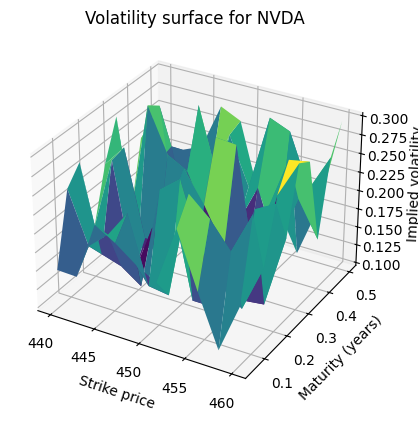

In [ ]:
import yfinance as yf
import pandas as pd
from scipy.optimize import brentq
from math import log, sqrt, exp
from scipy.stats import norm

# Fetch options data for a specific stock, e.g., SPY
ticker = 'NVDA'
stock = yf.Ticker(ticker)

# Get available expiration dates
expiration_dates = stock.options
print(f"Available Expiration Dates: {expiration_dates}")

# Select an expiration date and fetch options chain
exp_date = expiration_dates[0]
options_chain = stock.option_chain(exp_date)

calls = options_chain.calls
puts = options_chain.puts

print(calls.head())

def bs_call_price(S, K, T, r, sigma):
    d1 = (log(S/K) + (r + sigma**2 / 2) * T) / (sigma * sqrt(T))
    d2 = d1 - sigma * sqrt(T)
    return S * norm.cdf(d1) - K * exp(-r * T) * norm.cdf(d2)

def implied_volatility(option_price, S, K, T, r):
    objective_function = lambda sigma: bs_call_price(S, K, T, r, sigma) - option_price
    return brentq(objective_function, 1e-6, 5)

S = 100
K = 105
T = 30/365
r = 0.01
option_price = 7.5

iv = implied_volatility(option_price, S, K, T, r)
print(f"Implied volatility: {iv:.2%}")

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

strikes = np.linspace(440, 460, 10)
maturities = np.linspace(0.05, 0.5, 10)

vol_surface = np.random.rand(10, 10) * 0.2 + 0.1

X, Y = np.meshgrid(strikes, maturities)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, vol_surface, cmap='viridis')

ax.set_xlabel('Strike price')
ax.set_ylabel('Maturity (years)')
ax.set_zlabel('Implied volatility')
ax.set_title(f'Volatility surface for {ticker}')

plt.show()